In [1]:
import pandas as pd

In [22]:
filePath = "D:\\hse_master\\Прикладная наука о данных\\project\\data\\raw\\Bank\\Bank Customer Churn Prediction.csv"
filePath

'D:\\hse_master\\Прикладная наука о данных\\project\\data\\raw\\Bank\\Bank Customer Churn Prediction.csv'

In [13]:
import matplotlib, seaborn as sns
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

matplotlib: 3.5.1
seaborn: 0.11.2


In [14]:
# Полный код анализа данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Настройки отображения
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
plt.style.use("seaborn")
# Загрузка данных и первичный анализ данных
def load_data(file_path):
    df = pd.read_csv(file_path)
    print(f"Размер данных: {df.shape}")
    print(f"\nИнформация о данных:")
    print(df.info())
    print(f"\nСтатистика данных:")
    print(df.describe())
    return df

In [15]:
# Анализ пропущенных значений
def analyze_missing_data(df):
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'missing_count': missing_data,
        'missing_percent': missing_percent
    })
    print("\nАнализ пропущенных значений:")
    print(missing_df[missing_df['missing_count'] > 0])
    return missing_df


In [16]:
# Визуализация распределений
def plot_distributions(df, numerical_columns):

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for i, col in enumerate(numerical_columns[:4]):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Распределение {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Частота')

    plt.tight_layout()
    plt.show()


In [17]:
# Анализ корреляций
def analyze_correlations(df, numerical_columns):

    correlation_matrix = df[numerical_columns].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                square=True)
    plt.title('Матрица корреляций числовых переменных')
    plt.show()

    return correlation_matrix

In [18]:
# Основная функция анализа
def comprehensive_analysis(file_path):
    # Комплексный анализ данных
    # Загрузка данных
    df = load_data(file_path)

    # Анализ пропущенных значений
    analyze_missing_data(df)

    # Выделение числовых и категориальных переменных
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    print(f"\nЧисловые переменные: {numerical_columns}")
    print(f"Категориальные переменные: {categorical_columns}")

    # Визуализация распределений
    if numerical_columns:
        plot_distributions(df, numerical_columns)

    # Анализ корреляций
    if len(numerical_columns) > 1:
        analyze_correlations(df, numerical_columns)

    # Анализ временных рядов (если есть дата)
    date_columns = df.select_dtypes(include=['datetime64']).columns.tolist()
    if date_columns:
        for date_col in date_columns:
            df[date_col] = pd.to_datetime(df[date_col])
            df['year'] = df[date_col].dt.year
            df['month'] = df[date_col].dt.month
            df['day'] = df[date_col].dt.day

            # Агрегация по времени
            time_series = df.groupby([date_col])['value_column'].sum()
            time_series.plot(figsize=(12, 6))
            plt.title(f'Динамика по времени ({date_col})')
            plt.xlabel('Дата')
            plt.ylabel('Сумма')
            plt.show()

    return df

Размер данных: (10000, 12)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

Статистика данных:
        customer_id  credit_score           age        tenure        balance  products_number  c

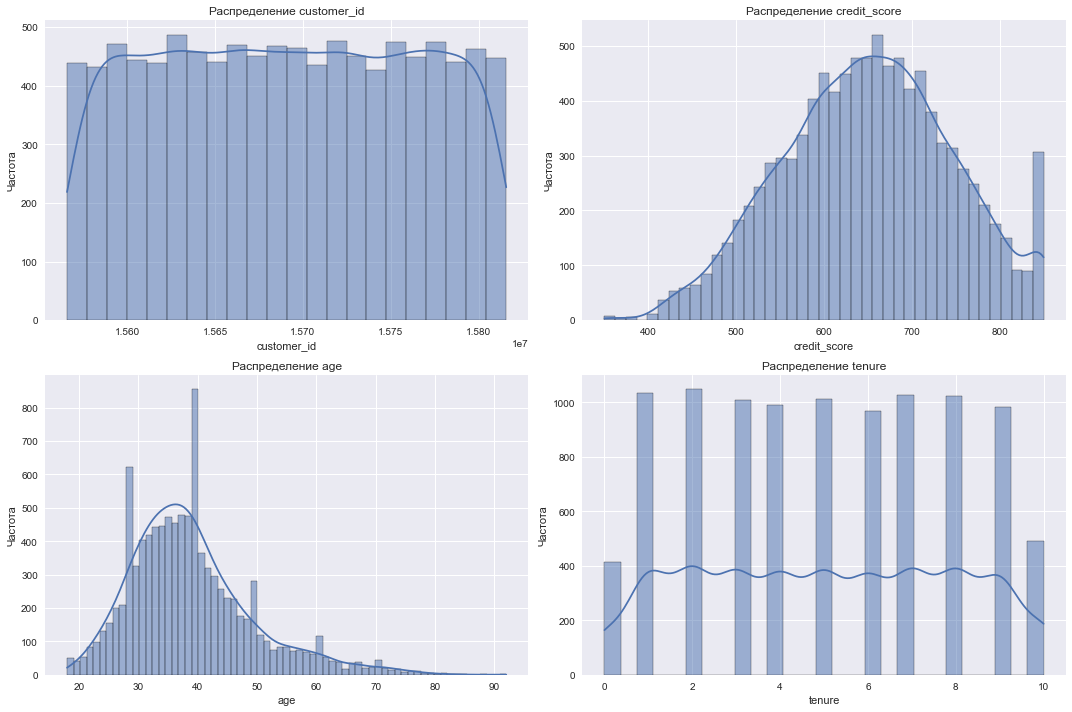

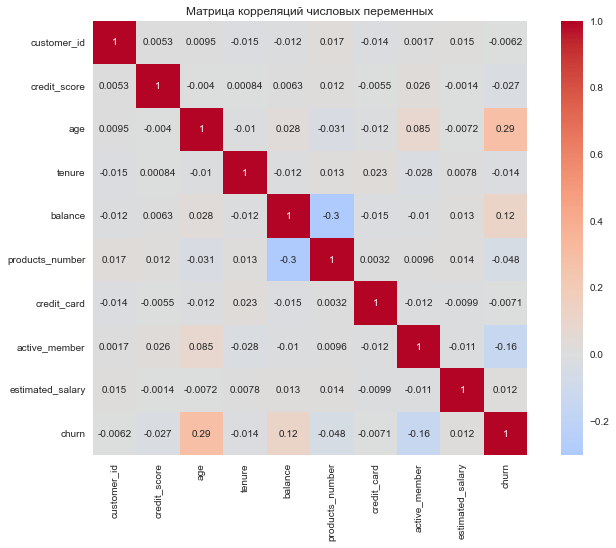

In [24]:
    df = comprehensive_analysis(filePath)